The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Import DataFrame
nobel = pd.read_csv("data/nobel.csv")

# Check data format
print(nobel.head())
print(nobel.columns)

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]
Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


In [2]:
# Most commonly awarded gender and birth country
top_gender = nobel.value_counts("sex").index[0]
top_country = nobel.value_counts("birth_country").index[0]
print(top_gender)
print(top_country)

Male
United States of America


2000


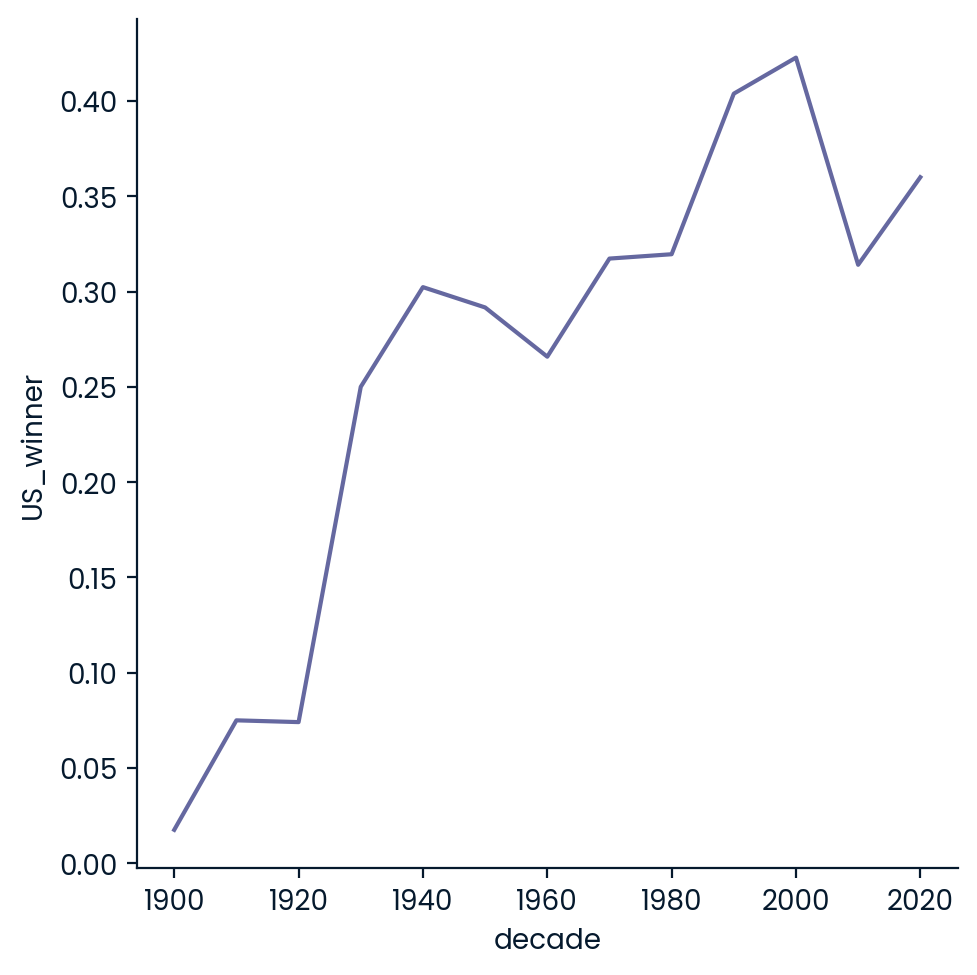

In [3]:
# Decade with highest ratio of US-born Nobel Prize winners
# Create the US-born winners column and decade column
nobel['US_winner'] = nobel["birth_country"] == "United States of America"
nobel["decade"] = (np.floor(nobel["year"] / 10) * 10).astype(int)

# Find ratio
ratio = nobel.groupby('decade', as_index=False)['US_winner'].mean()

# Decade with highest ratio
max_decade_usa = ratio[ratio['US_winner'] == ratio['US_winner'].max()]['decade'].values[0]
print(max_decade_usa)

# Relational line plot
plot_decades_usa = sns.relplot(x="decade", y="US_winner", data=ratio, kind="line")

{2020: 'Literature'}


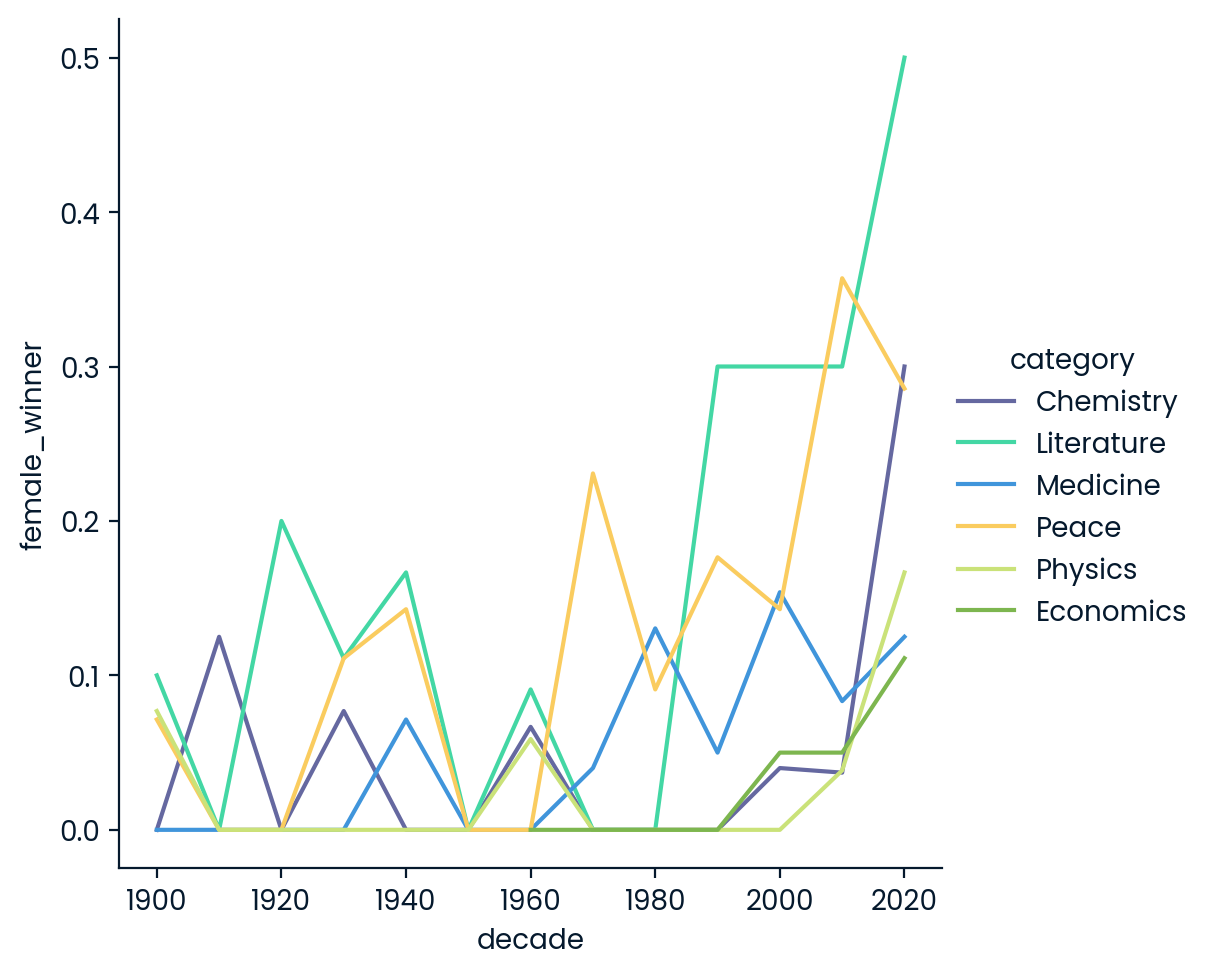

In [4]:
# Decade and category with highest proportion of female laureates
# Flag female winners
nobel['female_winner'] = nobel['sex'] == "Female"

# Group by columns
fem_wins = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Decade and category with highest female winners
max_female = fem_wins[fem_wins['female_winner'] == fem_wins['female_winner'].max()][['decade', 'category']]

# Create dictionary
max_female_dict = { max_female['decade'].values[0] : max_female['category'].values[0] }
print(max_female_dict)

# Relational line plot with multiple categories
plot_max_female = sns.relplot(x='decade', y='female_winner', data=fem_wins, kind='line', hue='category')

In [5]:
# First woman to win a Nobel Prize
# Filter DataFrame for women
nobel_women = nobel[nobel['female_winner']]

# Find first woman
first_woman_name = nobel_women[nobel_women['year'] == nobel_women['year'].min()]['full_name'].values[0]
first_woman_category = nobel_women[nobel_women['year'] == nobel_women['year'].min()]['category'].values[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [6]:
# Determine repeat winners
repeats = nobel.value_counts('full_name')
repeats = repeats[repeats > 1].index
repeat_list = list(repeats)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Frederick Sanger',
 'Linus Carl Pauling',
 'John Bardeen',
 'Marie Curie, née Sklodowska']